# Budget Analysis

---

## Environment Setup

In [34]:
# Initial Imports
import os
import plaid
import requests
import datetime
import calendar
import json
import pandas as pd
from dotenv import load_dotenv
import matplotlib.pyplot as plt

%matplotlib inline

In [35]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))


def report_writer(text):
    """
    This function writes supplied text to a readme report file.
    """
    with open("report/README.md", "a") as myfile:
        myfile.write('\n')
        myfile.write(text)


In [36]:
# Set environment variables from the .env file
load_dotenv()

True

In [38]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SECRET = os.getenv("PLAID_SECRET")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")

---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [40]:
# Create the client object
client = plaid.Client(client_id=PLAID_CLIENT_ID, 
secret=PLAID_SECRET,
public_key=PLAID_PUBLIC_KEY,
environment="sandbox")

In [41]:
# Set the institution id
INSTITUTION_ID = "ins_109508"

### 2. Generate a public token

In [42]:
# Create the public token
response_tkn = client.Sandbox.public_token.create(INSTITUTION_ID, ["transactions","income","assets"])

# Print the public token
print(response_tkn)

{'public_token': 'public-sandbox-37082c29-14e1-4fb2-8d48-f4f10c011d55', 'request_id': '2rInBCtm0B5lTVE'}


### 3. Exchange the public token for an access token

In [43]:
# Retrieve the access token
response_exchange = client.Item.public_token.exchange(response_tkn["public_token"])

# Print the access token
print(response_exchange)

{'access_token': 'access-sandbox-95bb8699-6270-42f0-aef9-888abc991413', 'item_id': 'px6yDzQm7aI5eXGQELnxCZmrmMVPpzCLWvKQQ', 'request_id': '47LmOt7Ta3cKB2i'}


In [45]:
# Store the access token in a Python variable
access_token = response_exchange["access_token"]

### 4. Fetch Accounts

In [46]:
# Intilize Report READ.me file and write report titles
# Remove previous report file
os.remove("report/README.md")

# Wrtie report headers
report_writer("# Budgeting and Financial Planning Report" + "   "+ "\n")
report_writer("### Ian Davies" + "   \n")
report_writer("### Home Work API's" + "   \n")
report_writer("Report Date: " + str("{:%Y-%m-%d}".format(datetime.datetime.now())))
report_writer("# Budget Analysis" + "   \n")

In [47]:
# Retrieve accounts
accounts_response = client.Accounts.get(access_token)

# Print accounts
for account in accounts_response["accounts"]:
    pretty_print_response(account["name"])


"Plaid Checking"
"Plaid Saving"
"Plaid CD"
"Plaid Credit Card"
"Plaid Money Market"
"Plaid IRA"
"Plaid 401k"
"Plaid Student Loan"
"Plaid Mortgage"


In [48]:
# Write account summary to report
report_writer("## Account Summary" + "   ")

for account in accounts_response["accounts"]:
     # Write account summary to report
    report_writer(str(account["name"])+"  ")

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [49]:
# Set the start and end date 90 days from today
start_date = "{:%Y-%m-%d}".format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = "{:%Y-%m-%d}".format(datetime.datetime.now()) 

# Retrieve the transactions for the last 90 days
transactions_response = client.Transactions.get(access_token, start_date, end_date)

# Print the transactions
transactions_response = client.Transactions.get(access_token, start_date, end_date)
pretty_print_response(transactions_response)

AkE6am7uPpQejV",
            "account_owner": null,
            "amount": 500,
            "authorized_date": null,
            "category": [
                "Food and Drink",
                "Restaurants"
            ],
            "category_id": "13005000",
            "date": "2020-04-25",
            "iso_currency_code": "USD",
            "location": {
                "address": null,
                "city": null,
                "country": null,
                "lat": null,
                "lon": null,
                "postal_code": null,
                "region": null,
                "store_number": null
            },
            "merchant_name": "Tectra Inc",
            "name": "Tectra Inc",
            "payment_channel": "in store",
            "payment_meta": {
                "by_order_of": null,
                "payee": null,
                "payer": null,
                "payment_method": null,
                "payment_processor": null,
                "ppd_id": null,
 

### 2. Print the categories for each transaction

In [50]:
# Create a for-loop to print the categories for each transaction

for transaction in transactions_response["transactions"]:
    pretty_print_response(transaction["category"])

[
    "Travel",
    "Airlines and Aviation Services"
]
[
    "Travel",
    "Taxi"
]
[
    "Food and Drink",
    "Restaurants"
]
[
    "Payment"
]
[
    "Food and Drink",
    "Restaurants",
    "Fast Food"
]
[
    "Shops",
    "Sporting Goods"
]
[
    "Payment",
    "Credit Card"
]
[
    "Travel",
    "Taxi"
]
[
    "Transfer",
    "Debit"
]
[
    "Transfer",
    "Deposit"
]
[
    "Recreation",
    "Gyms and Fitness Centers"
]
[
    "Travel",
    "Airlines and Aviation Services"
]
[
    "Food and Drink",
    "Restaurants",
    "Fast Food"
]
[
    "Food and Drink",
    "Restaurants",
    "Coffee Shop"
]
[
    "Food and Drink",
    "Restaurants"
]
[
    "Transfer",
    "Credit"
]
[
    "Travel",
    "Airlines and Aviation Services"
]
[
    "Travel",
    "Taxi"
]
[
    "Food and Drink",
    "Restaurants"
]
[
    "Payment"
]
[
    "Food and Drink",
    "Restaurants",
    "Fast Food"
]
[
    "Shops",
    "Sporting Goods"
]
[
    "Payment",
    "Credit Card"
]
[
    "Travel",
    "Taxi"
]
[
 

In [51]:
# Write spending categories to READ.me report
all_categories = pd.DataFrame()
for transaction in transactions_response["transactions"]:
    all_categories = all_categories.append({'category':transaction['category'][0]}, ignore_index=True)
    
all_categories = all_categories.groupby("category").count().reset_index() 

# Write cartegories summary to report
report_writer("## Transactions Category Summary" + "   ")
for index, value in all_categories.items():
    report_writer(str(value)+"    \n")

### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

In [52]:
# Define an empty DataFrame and set the columns as date, name, amount, and category
all_trans = pd.DataFrame(columns = ["date", "name", "amount", "category"])

# Retrieve all the transactions
transactions_response = client.Transactions.get(access_token, start_date, end_date)

# Populate the transactions DataFrame with the transactions data
for transaction in transactions_response["transactions"]:
   
        all_trans = all_trans.append({
                'date': transaction['date'], 
                'name': transaction['name'], 
                'amount': transaction['amount'], 
                'category':transaction['category'][0]}, 
                ignore_index=True)

# Display sample data from the DataFrame 
all_trans.head()

,date,name,amount,category
0,2020-06-29,United Airlines,500,Travel
1,2020-06-27,Uber 072515 SF**POOL**,6.33,Travel
2,2020-06-24,Tectra Inc,500,Food and Drink
3,2020-06-23,AUTOMATIC PAYMENT - THANK,2078.5,Payment
4,2020-06-23,KFC,500,Food and Drink


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [53]:
# Display data types
all_trans.dtypes

date        object
name        object
amount      object
category    object
dtype: object

In [54]:
# Make any required data type transformation
all_trans['amount'] = all_trans['amount'].astype(float)
all_trans['date']= pd.to_datetime(all_trans['date']) 
all_trans.dtypes

date        datetime64[ns]
name                object
amount             float64
category            object
dtype: object

In [55]:
# Set the date column as index
all_trans.set_index('date', inplace=True)
# Display sample data
all_trans.head()

,name,amount,category
date,,,
2020-06-29,United Airlines,500.00,Travel
2020-06-27,Uber 072515 SF**POOL**,6.33,Travel
2020-06-24,Tectra Inc,500.00,Food and Drink
2020-06-23,AUTOMATIC PAYMENT - THANK,2078.50,Payment
2020-06-23,KFC,500.00,Food and Drink


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [56]:
# Fetch the income data
income_response = client.Income.get(access_token)
# Print the income data
pretty_print_response(income_response)

{
    "income": {
        "income_streams": [
            {
                "confidence": 0.99,
                "days": 690,
                "monthly_income": 500,
                "name": "UNITED AIRLINES"
            }
        ],
        "last_year_income": 6000,
        "last_year_income_before_tax": 7285,
        "max_number_of_overlapping_income_streams": 1,
        "number_of_income_streams": 1,
        "projected_yearly_income": 6085,
        "projected_yearly_income_before_tax": 7389
    },
    "request_id": "cY5arMUgcQnXDN3"
}


In [57]:
# Determine the previous year's gross income and print the results
prev_income = income_response["income"]["last_year_income"]
print(f" Previous year's gross income = ${prev_income}")


Previous year's gross income = $6000


In [58]:
# Write Income summary and previous year income to READ.me report
report_writer("## Income Summary" + "   ")
report_writer("Previous year's gross income = $" + str(prev_income)+"  ")

In [59]:
# Determine the current monthly income and print the results
monthly_income = income_response["income"]["income_streams"][0]["monthly_income"]
print(f"Current monthly income = ${monthly_income}")


Current monthly income = $500


In [60]:
# Write current monthly income to READ.me report
report_writer("Current monthly income = $" + str(monthly_income)+"  ")

In [61]:
# Determine the projected yearly income and print the results
ann_proj_income = income_response["income"]["projected_yearly_income"]

%store ann_proj_income

print(f"Projected Yearly Income = ${ann_proj_income}")

Stored 'ann_proj_income' (int)
Projected Yearly Income = $6085


In [62]:
# Write projected yearly income to READ.me report
report_writer("Projected Yearly Income = $" + str(ann_proj_income)+"  ")

---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

### Calculate the expenses per category

In [63]:
# Compute the total expenses per category
all_trans_grp = all_trans.groupby("category")['amount'].sum()
# Display the expenses per category
all_trans_grp


category
Food and Drink     3317.19
Payment            6310.50
Recreation          235.50
Shops              1500.00
Transfer          20537.34
Travel               35.19
Name: amount, dtype: float64

In [64]:
# Add budget analysis to READ.me report
report_writer("## Budget Analysis")
report_writer("### Spending by Category")
for index, values in all_trans_grp.items():
    report_writer(str(index) + " = $" + str(round(values)) + "  ")

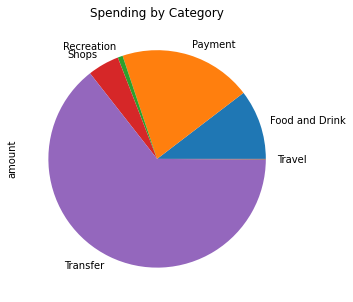

In [65]:
# Create a spending categories pie chart.
all_trans_grp.plot(kind="pie", figsize=(10,5), title='Spending by Category')


# Add spending graph to READ.me report
fig_a = "images/spending.png"
plt.plot(data=all_trans_grp)
plt.savefig(fig_a)
report_writer("![Spending by Category](" + fig_a + ")  ")

### Calculate the expenses per month

In [66]:
# Create a DataFrame with the total expenses
# Based on the provided sample bar graph, 5 months of data has been extracted.
start_date = "{:%Y-%m-%d}".format(datetime.datetime.now() + datetime.timedelta(-150))
end_date = "{:%Y-%m-%d}".format(datetime.datetime.now())

# Create dataframe with expense transaction date and amount columns
col_names = ["date", "amount"]
all_expenses = pd.DataFrame(columns = col_names)

# Retrieve all the transactions
expense_response = client.Transactions.get(access_token, start_date, end_date)

# Populate the expense transactions DataFrame with the transactions date and amount information
for transaction in expense_response["transactions"]:

        all_expenses = all_expenses.append({
                'date': transaction['date'], 
                'amount': transaction['amount']}, 
                 ignore_index=True)

# Convert date column to month only data
all_expenses['month'] = pd.DatetimeIndex(all_expenses['date']).month

# Drop date column and sort month column
all_expenses.drop(columns=['date'], inplace=True)
all_expenses["month"].sort_values()

# Group and sum expenses based on month
all_expenses_grp = all_expenses.groupby("month")["amount"].sum()
all_expenses_grp


month
2    10145.24
3    11145.24
4    10645.24
5    10645.24
6    10645.24
Name: amount, dtype: float64

In [67]:
# Add month expensesto READ.me report
report_writer("### Monthly Expenses")
for index, values in all_expenses_grp.items():
    report_writer(calendar.month_abbr[index] + " = $" + str(round(values)) + "  ")

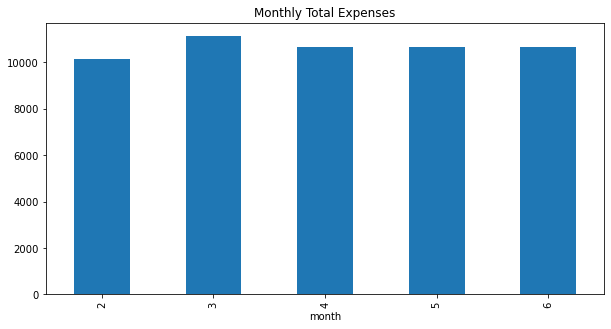

In [68]:
# Create a spending per month bar chart
all_expenses_grp.plot(kind="bar", figsize=(10,5), title='Monthly Total Expenses')


# Add spending graph to READ.me report
fig_b = "images/monthly_spend.png"
plt.plot(data=all_expenses_grp)
plt.savefig(fig_b)
report_writer("![Monthly Total Expenses](" + fig_b + ")  ")